In [1]:
import warnings
warnings.filterwarnings('ignore')


# The LIF model

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod):
    """
    Simulates the Leaky Integrate-and-Fire model of a neuron using Forward Euler method.
    
    Parameters:
        tau_m (float): membrane time constant (in seconds)
        R_m (float): membrane resistance (in ohms)
        V_rest (float): resting potential (in volts)
        I (callable): input current function of time (in amperes)
        V_init (float): initial membrane potential (in volts)
        dt (float): time step (in seconds)
        t_final (float): final simulation time (in seconds)
        
    Returns:
        t (array): time values (in seconds)
        V (array): membrane potential values (in volts)
    """
    
    # Initialize time and voltage arrays
    t = np.arange(0, t_final, dt)
    V = np.zeros_like(t)
    V[0] = V_init
    
    if numMethod == 'FE':
        # Numerical integration using Forward Euler method
        for i in range(1, len(t)):
            dVdt = (-(V[i-1] - V_rest) + R_m * I(t[i-1])) / tau_m
            V[i] = V[i-1] + dVdt * dt

            # Check for spike
            if V[i] >= 1.0:
                V[i] = V_rest
                
    if numMethod == 'BE':
        # Numerical integration using Backward Euler method
        for i in range(1, len(t)):
            dVdt=((V_rest-V[i-1] + R_m*I(t[i]))/tau_m) / (1+dt/tau_m)
            V[i] = V[i-1] + dVdt * dt

            # Check for spike
            if V[i] >= 1.0:
                V[i] = V_rest
                
    if numMethod == 'Heun':
        # Numerical integration using Heun's method
        for i in range(1, len(t)):
            k1 = (-(V[i-1] - V_rest) + R_m * I(t[i-1])) / tau_m
            k2 = (-(V[i-1] + dt*k1*tau_m - V_rest) + R_m * I(t[i])) / tau_m
            V[i] = V[i-1] + 0.5*dt*(k1 + k2)

            # Check for spike
            if V[i] >= 1.0:
                V[i] = V_rest
                
    if numMethod == 'RK4':
        # Numerical integration using Runge-Kutta 4 method
        for i in range(1, len(t)):
            k1 = dt * ((-(V[i-1] - V_rest) + R_m * I(t[i-1])) / tau_m)
            k2 = dt * ((-(V[i-1] + k1 / 2 - V_rest) + R_m * I(t[i-1] + dt / 2)) / tau_m)
            k3 = dt * ((-(V[i-1] + k2 / 2 - V_rest) + R_m * I(t[i-1] + dt / 2)) / tau_m)
            k4 = dt * ((-(V[i-1] + k3 - V_rest) + R_m * I(t[i-1] + dt)) / tau_m)

            V[i] = V[i-1] + 1/6 * (k1 + 2*k2 + 2*k3 + k4)

            # Check for spike
            if V[i] >= 1.0:
                V[i] = V_rest
            
    
    return t, V



# Generalities

## LIF with Forward Euler Method (explicit)

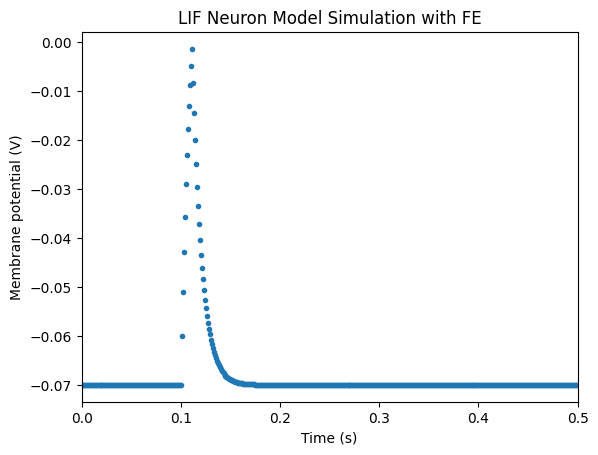

500

In [3]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  
    
# Set LIF model parameters
tau_m = 10e-3 # 10ms
R_m = 100e6 # 100Mohm
V_rest = -70e-3 # -70mV
V_init = V_rest # start at rest
dt = 0.001 # PARAMETER OF INTEREST
t_final = 0.5 # simulation time
numMethod = 'FE'

# Simulate LIF model with Forward Euler method
t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

# Plot voltage trace
plt.plot(t, V, '.')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()

len(V)

## LIF with Backward Euler Method (implicit)

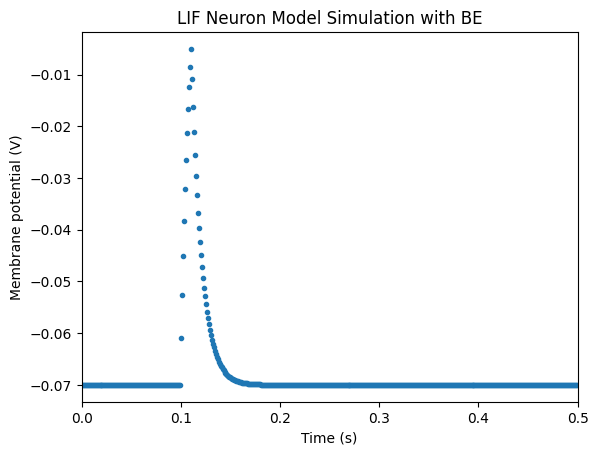

In [4]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  
    
# Set LIF model parameters
tau_m = 10e-3 # 10ms
R_m = 100e6 # 100Mohm
V_rest = -70e-3 # -70mV
V_init = V_rest # start at rest
dt = 0.001 # PARAMETER OF INTEREST
t_final = 0.5 # simulation time
numMethod = 'BE'

# Simulate LIF model with Backward Euler method
t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

# Plot voltage trace
plt.plot(t, V, '.')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()


## LIF with Heun Method (explicit)

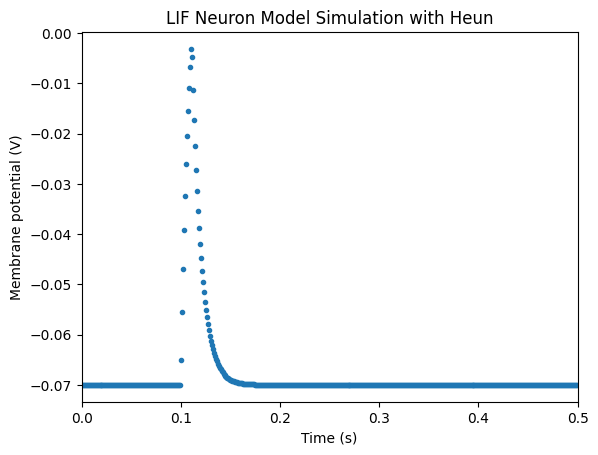

In [5]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  
    
# Set LIF model parameters
tau_m = 10e-3 # 10ms
R_m = 100e6 # 100Mohm
V_rest = -70e-3 # -70mV
V_init = V_rest # start at rest
dt = 0.001 # PARAMETER OF INTEREST
t_final = 0.5 # simulation time
numMethod = 'Heun'
# Simulate LIF model with Heun's method
t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

# Plot voltage trace
plt.plot(t, V, '.')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()


## LIF with RK4 Method (explicit)

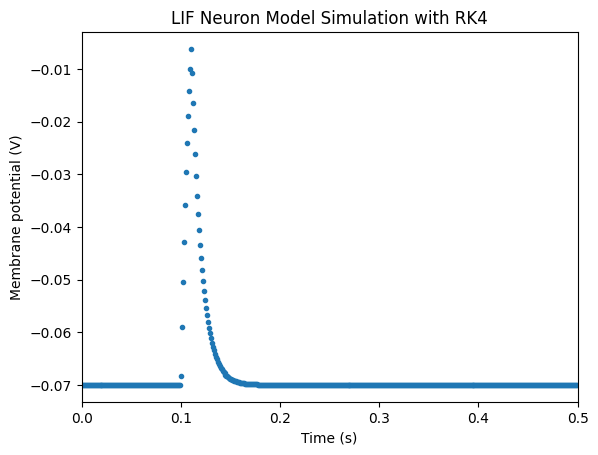

In [6]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  
    
# Set LIF model parameters
tau_m = 10e-3 # 10ms
R_m = 100e6 # 100Mohm
V_rest = -70e-3 # -70mV
V_init = V_rest # start at rest
dt = 0.001 # PARAMETER OF INTEREST
t_final = 0.5 # simulation time
numMethod = 'RK4'

# Simulate LIF model with Runge-Kutta 4 method
t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

# Plot voltage trace
plt.plot(t, V, '.')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()


# Comparison 

## Computational time

### one-input-current

In [7]:
# Define input current function
def I(t):
    if t >= 0.1 and t <= 0.11:
        return 1e-9 # 1nA current input for 50ms
    else:
        return 0.0 # no input current otherwise  

In [8]:
# dt di riferimento 0.001
import time

dt = 0.001
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,10), "seconds")




FE time taken:  0.0008718967 seconds
BE time taken:  0.0008490086 seconds
Heun time taken:  0.0012705326 seconds
RK4 time taken:  0.0273895264 seconds


In [9]:
# un decimo di dt di riferimento
import time

dt = 0.001/10
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")



FE time taken:  0.024749 seconds
BE time taken:  0.019535 seconds
Heun time taken:  0.053021 seconds
RK4 time taken:  0.117997 seconds


In [10]:
# un centesimo di dt di riferimento

import time

dt = 0.001/100
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")

FE time taken:  0.292082 seconds
BE time taken:  0.277234 seconds
Heun time taken:  0.496167 seconds
RK4 time taken:  0.716587 seconds


In [11]:
# un millesimo di dt di riferimento

import time

dt = 0.001/1000
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")

FE time taken:  2.833591 seconds
BE time taken:  2.909738 seconds
Heun time taken:  5.37955 seconds
RK4 time taken:  11.230985 seconds


### multiple-input-current

In [12]:
def I(t):
    pulse_dur = 0.01 # duration of each pulse in seconds
    pulse_interval = 0.05 # time interval between pulses in seconds
    num_pulses = 15 # number of pulses
    
    pulse_start_times = np.arange(0.1, 0.1 + num_pulses*pulse_interval, pulse_interval)
    
    for start_time in pulse_start_times:
        if t >= start_time and t <= start_time + pulse_dur:
            return 1e-9 # 1nA current input for pulse duration
    return 0.0 # no input current otherwise


FE time taken:  0.006723 seconds


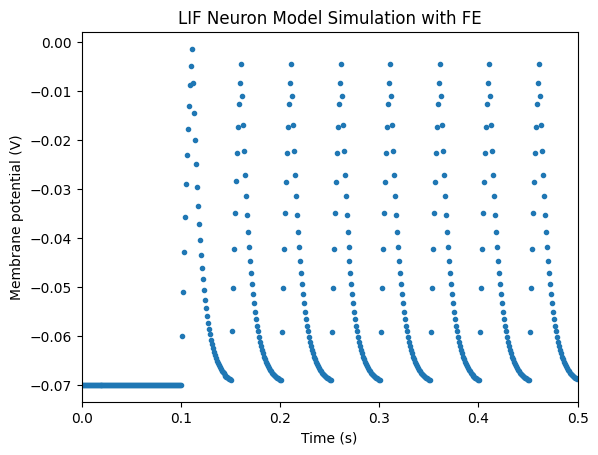

BE time taken:  0.003796 seconds


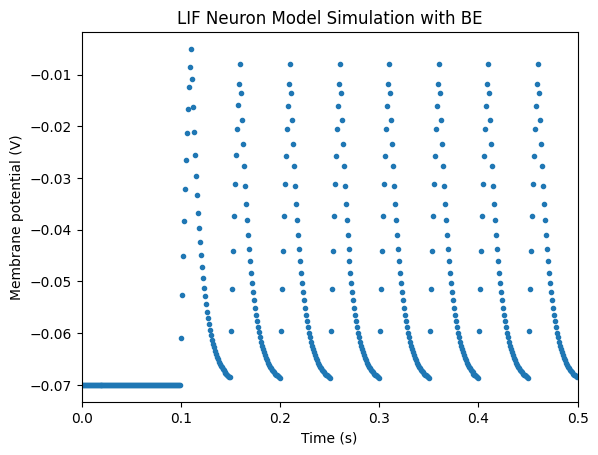

Heun time taken:  0.033691 seconds


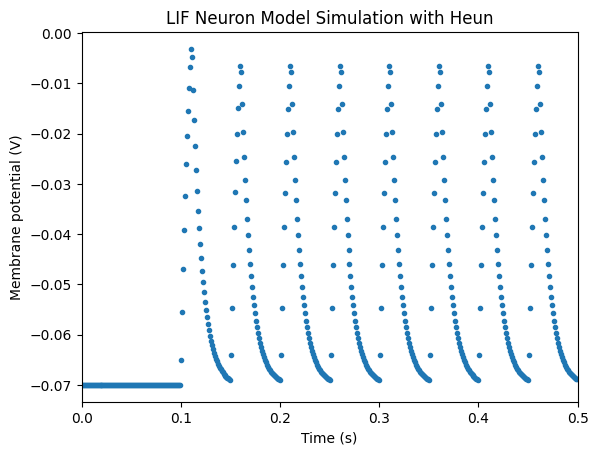

RK4 time taken:  0.047021 seconds


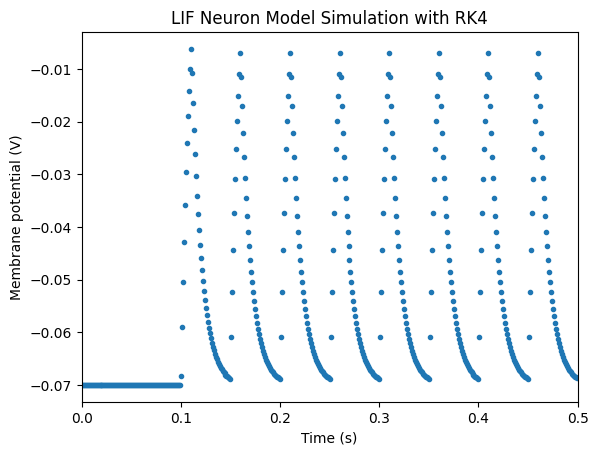

In [13]:
# given the same dt we look the multiple input current effect

import time

dt = 0.001
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")
    # Plot voltage trace
    plt.plot(t, V, '.')
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane potential (V)')
    plt.title('LIF Neuron Model Simulation with ' + numMethod)
    plt.xlim(0, t_final)
    plt.show()

FE time taken:  0.309635 seconds


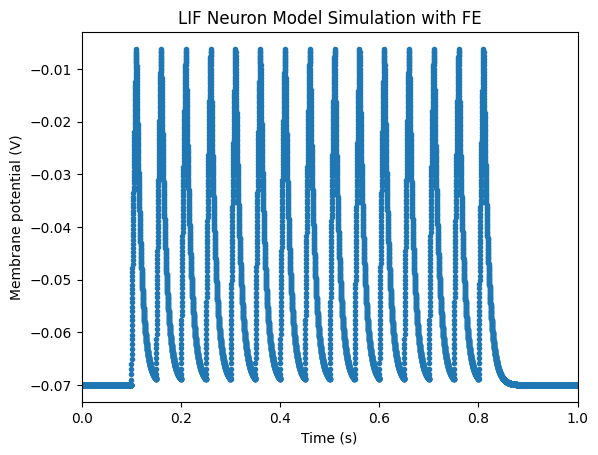

BE time taken:  0.176689 seconds


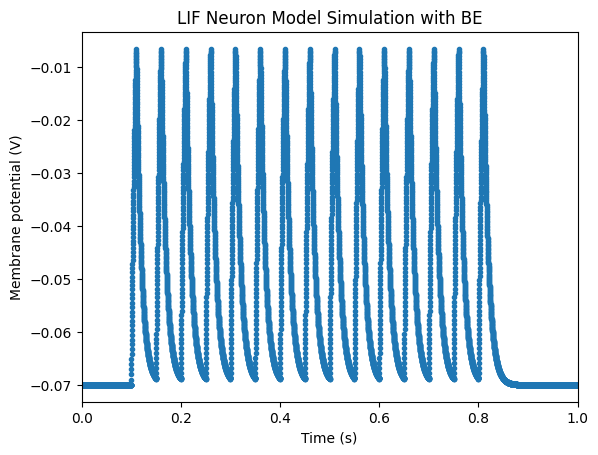

Heun time taken:  0.394491 seconds


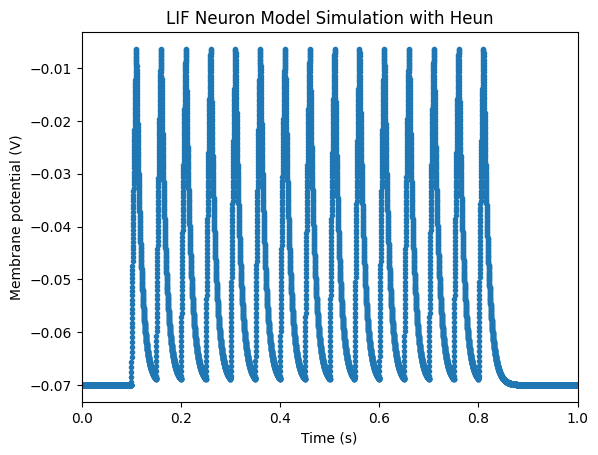

RK4 time taken:  0.769649 seconds


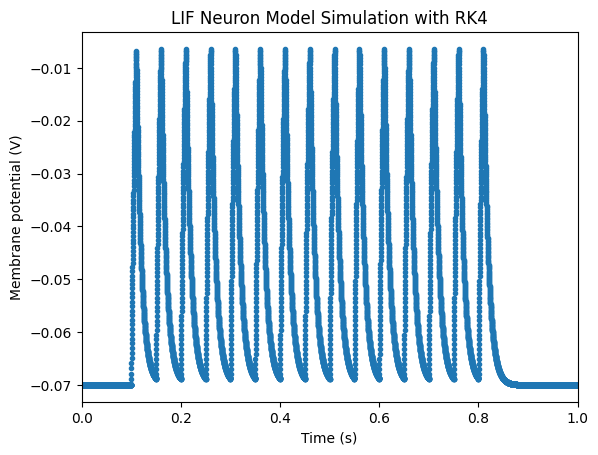

In [14]:
# decimal of the ref dt we look the multiple input current effect

import time

dt = 0.001/10
t_final = 1
for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
    start_time = time.time()    
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
    end_time = time.time()
    time_taken = end_time - start_time
    print(numMethod + " time taken: ", round(time_taken,6), "seconds")
    # Plot voltage trace
    plt.plot(t, V, '.')
    plt.xlabel('Time (s)')
    plt.ylabel('Membrane potential (V)')
    plt.title('LIF Neuron Model Simulation with ' + numMethod)
    plt.xlim(0, t_final)
    plt.show()

### overview

In [15]:
# range of different dt and check the computational time

t_final = 1
TIME = []
for dt in np.linspace(0.001,0.001/100, 100):
    for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
        start_time = time.time()    
        t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)
        end_time = time.time()
        time_taken = end_time - start_time
        TIME += [[numMethod, dt, time_taken]]
        #print(numMethod + " time taken: ", round(time_taken,6), "seconds")

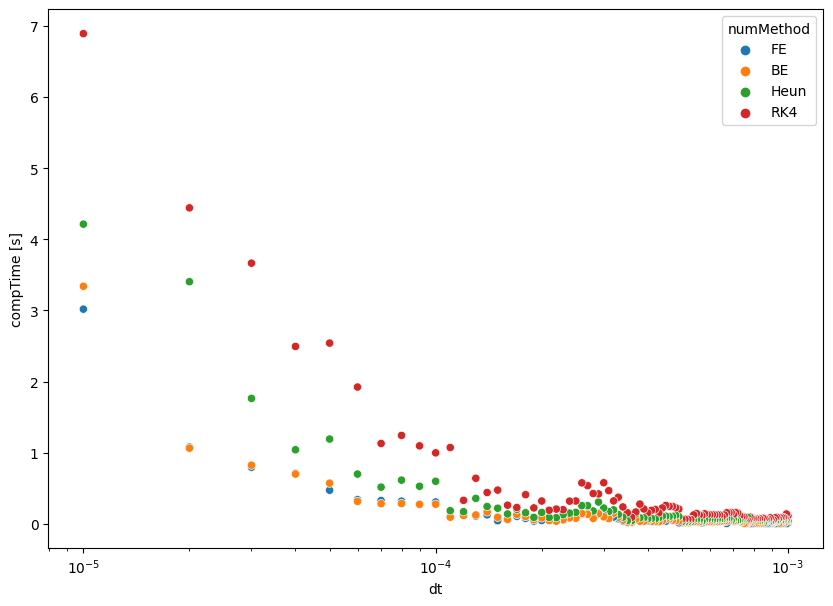

In [16]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame(TIME, columns=['numMethod', 'dt', 'compTime [s]'])

plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='dt', y='compTime [s]', hue='numMethod')

plt.xscale('log')
#plt.yscale('log')
#plt.savefig('./computation_time.jpeg', dpi=300, background='white')

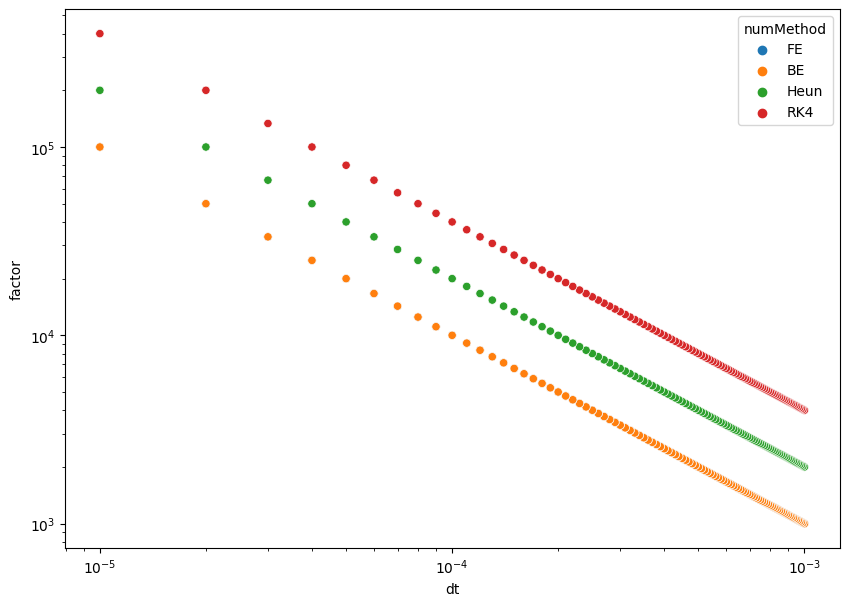

In [17]:
FACTOR = []
for dt in np.linspace(0.001,0.001/100, 100):
    for numMethod in ['FE', 'BE', 'Heun', 'RK4']:
        if numMethod == 'FE' or 'BE': EXP=1
        if numMethod == 'Heun': EXP=2
        if numMethod == 'RK4': EXP=4
        FACTOR += [[numMethod, dt, 1/dt*EXP]]

plt.figure(figsize=(10, 7))
sns.scatterplot(data=pd.DataFrame(data=FACTOR, columns=['numMethod', 'dt', 'factor']), x='dt', y='factor', hue='numMethod')
plt.xscale('log')
plt.yscale('log')

## Accuracy

In [18]:
def I(t):
    pulse_dur = 0.01 # duration of each pulse in seconds
    pulse_interval = 0.1 # time interval between pulses in seconds
    num_pulses = 100 # number of pulses
    
    pulse_start_times = np.arange(1, 0.1 + num_pulses*pulse_interval, pulse_interval)
    
    for start_time in pulse_start_times:
        if t >= start_time and t <= start_time + pulse_dur:
            return 1e-9 # 1nA current input for pulse duration
    return 0.0 # no input current otherwise

t_final=11 # secondS

### Reference solution

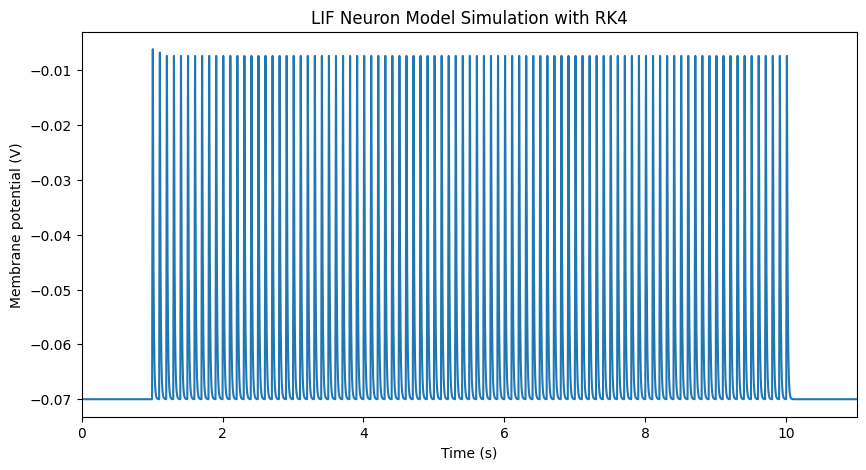

In [19]:
dt = 0.001
for numMethod in ['RK4']:
    t, V = LIF(tau_m, R_m, V_rest, I, V_init, dt, t_final, numMethod)

plt.figure(figsize=(10, 5))
plt.plot(t, V)#, ':')
plt.xlabel('Time (s)')
plt.ylabel('Membrane potential (V)')
plt.title('LIF Neuron Model Simulation with ' + numMethod)
plt.xlim(0, t_final)
plt.show()

### Test

In [20]:
# Reference solution
ref_t, ref_V = LIF(tau_m, R_m, V_rest, I, V_rest, dt, t_final, 'RK4')

# Numerical solution alternatives
fe_t, fe_V = LIF(tau_m, R_m, V_rest, I, V_rest, dt, t_final, 'FE')
be_t, be_V = LIF(tau_m, R_m, V_rest, I, V_rest, dt, t_final, 'BE')
heun_t, heun_V = LIF(tau_m, R_m, V_rest, I, V_rest, dt, t_final, 'Heun')

# MSE and MAE
fe_mse = np.mean((fe_V - ref_V)**2)
be_mse = np.mean((be_V - ref_V)**2)
heun_mse = np.mean((heun_V - ref_V)**2)

fe_mae = np.max(np.abs(fe_V - ref_V))
be_mae = np.max(np.abs(be_V - ref_V))
heun_mae = np.max(np.abs(heun_V - ref_V))


In [21]:
# MSE sorted
mse_values = {'FE': fe_mse, 'BE': be_mse, 'Heun': heun_mse}
sorted_mse = sorted(mse_values.items(), key=lambda x: x[1], reverse=True)

print("MSE (sorted):")
print(" ")
for method, mse in sorted_mse:
    print(f"{method}: {mse:.10f}")
    
print(' ')

MSE (sorted):
 
FE: 0.0000031956
Heun: 0.0000005493
BE: 0.0000002347
 


In [22]:
# MAE sorted
mae_values = {'FE': fe_mae, 'BE': be_mae, 'Heun': heun_mae}
sorted_mae = sorted(mae_values.items(), key=lambda x: x[1], reverse=True)

print("MAE (sorted):")
print(" ")
for method, mae in sorted_mae:
    print(f"{method}: {mae:.5f}")

MAE (sorted):
 
FE: 0.00991
BE: 0.00910
Heun: 0.00646
